In [1]:
#import library yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [2]:
data = pd.read_csv('motor_second.csv')
data

,model,tahun,harga,transmisi,odometer,jenis,pajak,konsumsiBBM,mesin
0,Supra X 125,2017,7999,Manual,17307,Bebek,145.0,58.9,125.0
1,Vario 125,2016,14499,Automatic,25233,Skuter,235.0,43.5,125.0
2,Vario 125,2016,11399,Automatic,37877,Skuter,30.0,61.7,125.0
3,Revo,2016,6499,Manual,23789,Bebek,20.0,60.1,110.0
4,PCX,2015,10199,Automatic,33177,Skuter,160.0,51.4,150.0
...,...,...,...,...,...,...,...,...,...
194,Vario 125,2019,15998,Automatic,17841,Skuter,150.0,34.9,125.0
195,Genio,2015,8798,Automatic,21701,Skuter,150.0,48.7,110.0
196,Vario 125,2019,15498,Automatic,15751,Sport,150.0,34.9,125.0
197,Supra X 125,2016,8298,Manual,17499,Bebek,30.0,55.4,125.0


In [5]:
#menampilkan data csv
print("Data Information:")
print(data.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   model        199 non-null    object 
 1   tahun        199 non-null    int64  
 2   harga        199 non-null    int64  
 3   transmisi    199 non-null    object 
 4   odometer     199 non-null    int64  
 5   jenis        199 non-null    object 
 6   pajak        199 non-null    float64
 7   konsumsiBBM  199 non-null    float64
 8   mesin        198 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 14.1+ KB
None


In [7]:
#menampilkan detail dekripsi
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
             tahun         harga       odometer       pajak  konsumsiBBM  \
count   199.000000    199.000000     199.000000  199.000000   199.000000   
mean   2016.618090  11385.015075   23468.306533  110.395477    53.905528   
std       1.712955   4534.671984   15689.247247   63.600019    11.819869   
min    2011.000000   3799.000000    1391.000000    0.000000    28.000000   
25%    2016.000000   7996.500000   12696.000000   30.000000    44.800000   
50%    2017.000000  10998.000000   21119.000000  145.000000    56.500000   
75%    2018.000000  14498.500000   32103.000000  145.000000    60.100000   
max    2019.000000  34998.000000  119050.000000  300.000000   125.000000   

            mesin  
count  198.000000  
mean   123.914141  
std     16.821177  
min      0.000000  
25%    110.000000  
50%    125.000000  
75%    125.000000  
max    150.000000  


In [9]:
# menangani missing values
data['mesin'].fillna(data['mesin'].median(), inplace=True)

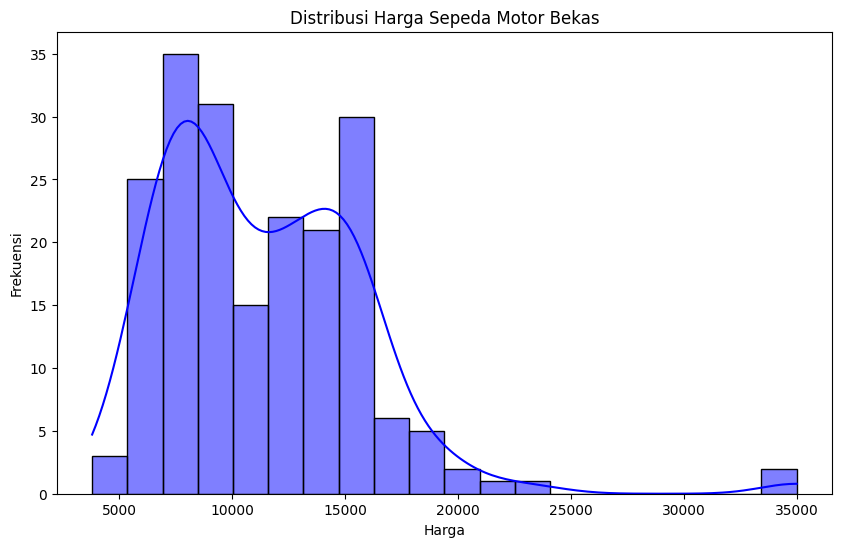

In [11]:
# Visualisasikan distribusi variabel target
plt.figure(figsize=(10, 6))
sns.histplot(data['harga'], kde=True, bins=20, color='blue')
plt.title("Distribusi Harga Sepeda Motor Bekas")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.show()

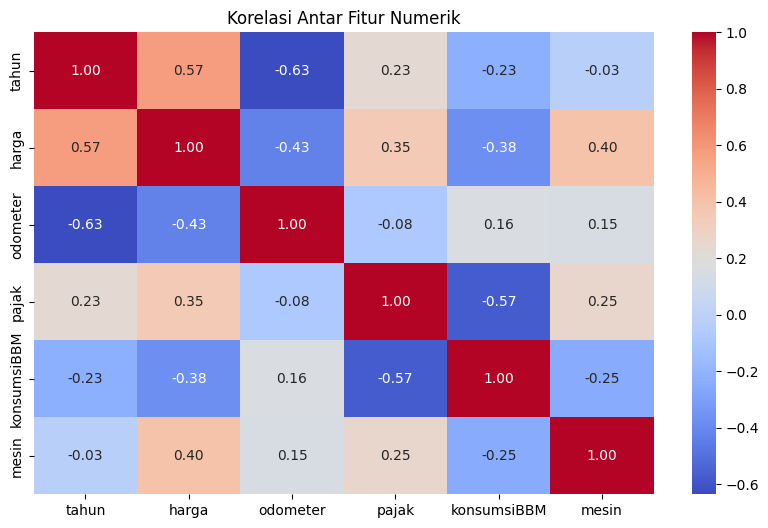

In [13]:
# peta korelasi untuk fitur numerik
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

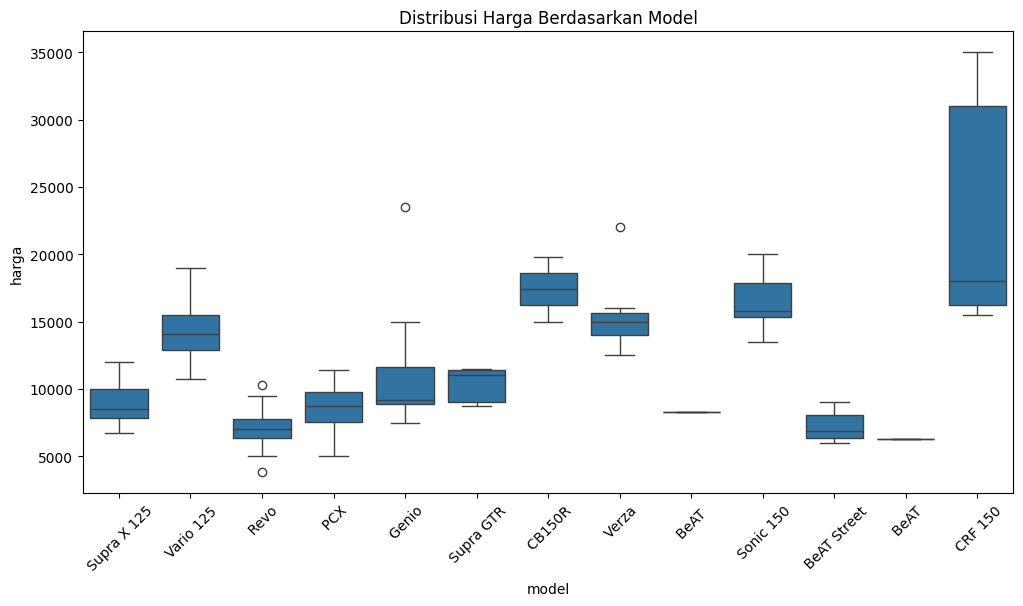

In [15]:
# Boxplot dengan model dan price
plt.figure(figsize=(12, 6))
sns.boxplot(x='model', y='harga', data=data)
plt.title("Distribusi Harga Berdasarkan Model")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Pemisahan fitur dan target
X = data.drop(columns=['harga'])
y = data['harga']

In [19]:
# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Alur kerja praproses
categorical_features = ['model', 'transmisi', 'jenis']
numerical_features = ['tahun', 'odometer', 'pajak', 'konsumsiBBM', 'mesin']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [23]:
# Model alur kerja
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [25]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tahun', 'odometer', 'pajak',
                                                   'konsumsiBBM', 'mesin']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['model', 'transmisi',
                                                   'jenis'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [27]:
# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 844.4099999999999
Root Mean Squared Error (RMSE): 1169.3810367797146


In [29]:
# Save the model
model_filename = "motor_second_model.pkl"
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as motor_second_model.pkl


In [31]:
# Example prediction
sample_input = pd.DataFrame({
    "model": ["Supra X 125"],
    "tahun": [2018],
    "transmisi": ["Manual"],
    "odometer": [20000],
    "jenis": ["Bebek"],
    "pajak": [150.0],
    "konsumsiBBM": [45.0],
    "mesin": [125.0]
})
predicted_price = model.predict(sample_input)[0]
print(f"Predicted Price for Sample Input: Rp {predicted_price:,.0f}")

Predicted Price for Sample Input: Rp 10,350
